# Obtén datos de la API de Marvel

![imagen](https://cdn.hobbyconsolas.com/sites/navi.axelspringer.es/public/styles/hc_1440x810/public/media/image/2021/09/marvel-2460339.jpg?itok=cBnC1CBi)

Te tendrás que [registrar](https://developer.marvel.com/) y consultar la [documentación](https://developer.marvel.com/docs)

Queremos que consultes a la api para que te devuelva la info de los personajes de marvel que empiecen por la inicial de tu nombre. Deberemos guardarlos en un csv la información con la siguiente estructura

![imagen](./img/Captura_marvel.PNG)

Aquí te dejamos el código en python para poder empezar a hacer las llamadas, rellenando algunas variables como tus keys, parámetros de la llamada y la url (endpoint) a la que quieres acceder


    ts - a timestamp (or other long string which can change on a request-by-request basis)
    hash - a md5 digest of the ts parameter, your private key and your public key (e.g. md5(ts+privateKey+publicKey)

In [ ]:
# For example, a user with a public key of "1234" and a private key of "abcd" could construct a valid
# call as follows:
#  http://gateway.marvel.com/v1/public/comics?ts=1&apikey=1234&hash=ffd275c5130566a2916217b101f26150
#  (the hash value is the md5 digest of 1abcd1234)

In [ ]:
import requests
import hashlib
import time
import csv
from marvel import Marvel

# private_key = ""
# public_key = ""
# private_key = ""
# public_key = ""
private_key = ''  # eduardo
public_key = ''         #eduardo


# marvel = Marvel(public_key, private_key)
# characters =  marvel.characters.all()
# print(len(characters))


In [ ]:
# Generar timestamp y hash
ts = str(int(time.time()))
hash_input = ts + private_key + public_key
hash_result = hashlib.md5(hash_input.encode()).hexdigest()

# Endpoint y parámetros
url = "https://gateway.marvel.com/v1/public/characters"
params = {
    "ts": ts,
    "apikey": public_key,
    "hash": hash_result,
    "nameStartsWith": 'A',  # Cambia la letra si quieres otra inicial
}

# Llamada a la API
response = requests.get(url, params=params)
print(response.status_code, response.text)

In [19]:
data = response.json()
# Extract data
characters = data["data"]["results"]
rows = []

for char in characters:
    id_ = char["id"]
    name = char["name"]
    picture_url = f"{char['thumbnail']['path']}.{char['thumbnail']['extension']}"
    rows.append([id_, name, picture_url])

# Write to CSV
with open("marvel_characters.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["ID", "Name", "Picture URL"])
    writer.writerows(rows)

print("CSV file 'marvel_characters.csv' created successfully.")

CSV file 'marvel_characters.csv' created successfully.


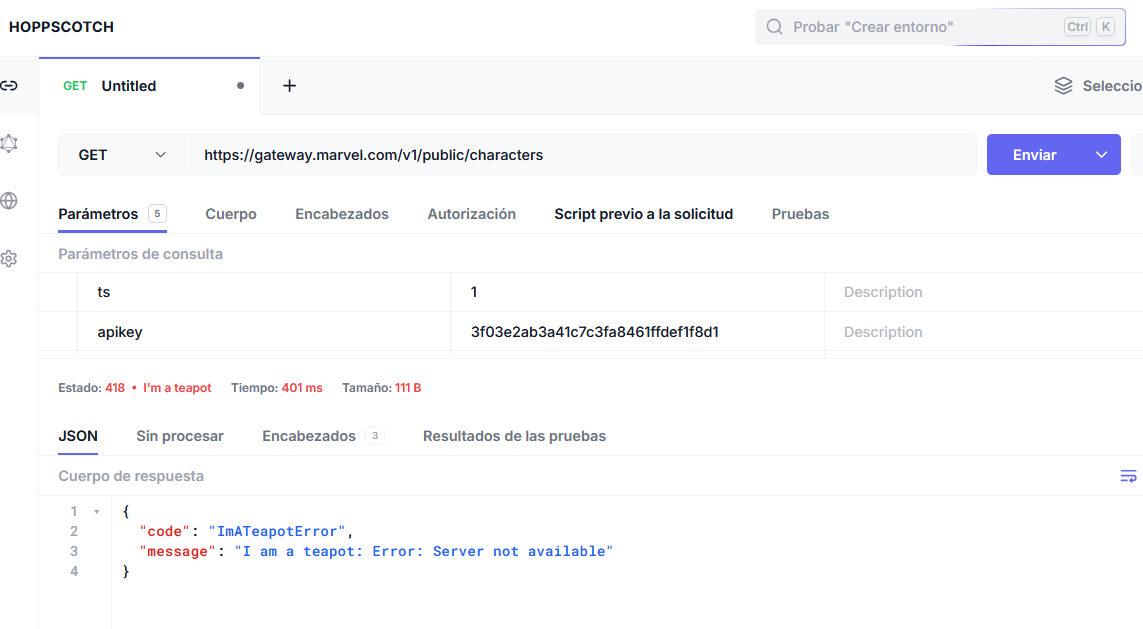

In [ ]:
import time
import hashlib
import requests

# public_key = "your_public_key"
# private_key = "your_private_key"


ts = str(int(time.time()))
hash_input = ts + private_key + public_key
hash_result = hashlib.md5(hash_input.encode()).hexdigest()

url = "https://gateway.marvel.com/v1/public/characters"
params = {
    "ts": ts,
    "apikey": public_key,
    "hash": hash_result,
    "nameStartsWith": 'A',
    "limit": 100
}

response = requests.get(url, params=params)
print("URL:", response.url)
print("Status:", response.status_code)
print("Response:", response.text)
